# TP3 : Convergences et génération des lois de probabilités
### Auteur : ARGUELLO Camilo

### Introduction

L'objectif de ce TP est d'étudier la génération des lois de probabilité en estimant leur moyenne et leur variance. Nous allons d'abord générer la loi exponentielle à partir de la loi uniforme.

Ensuite, nous examinerons la loi de probabilité pour le comptage d'un nombre d'événements dans un intervalle de temps et son lien avec la loi de Poisson. Enfin, nous étudierons la planche de Galton et son application aux lois de probabilité.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.special import factorial
from scipy.stats import poisson

## Génération d'une loi exponentielle à partir d'une loi uniforme

Dans cette première partie, nous allons créer un générateur aléatorie de nombres suivant une loi exponentielle à partir de la méthode de la transformation inverse. 

Pour obtenir un générateur de nombres suivant une loi de probabilité $g$, il faut connaitre sa fonction cumulative $G$ et trouver son inverse $h$.

On considère la fonction de densité de probabilité $g(t)$ définit comme:

$$ g(t) = \frac{1}{\tau} e^{-\frac{t}{\tau}} $$

Si on sait que:

$$ g(t) = \frac{d \ G(t)}{dt} $$

On peut montrer que la fonction cumulative de cette densité est :

$$ G(t) = \int_{0}^{t} g(t) dt $$

$$ G(t) = \int_{0}^{t} \frac{1}{\tau} e^{-\frac{t}{\tau}} dt $$

$$ G(t) = \frac{1}{\tau} \int_{0}^{t} e^{-\frac{t}{\tau}} dt $$

$$ G(t) = \left[ -e^{-\frac{t}{\tau}} \right]_{0}^{t} $$

$$ G(t) = 1 - e^{-\frac{t}{\tau}} $$

Alors, notre première objectif est de vérifier que la fonction 

$$ h (x) = -\tau \ ln(1-t) $$

est bien la fonction inverse de la fonction cumulative $G(t)$. Nous pouvons vérifier cela en calculant les fonctions composées $h(G(t))$ et $G(h(t))$.

$$ G(h(t)) = 1 - e^{\frac{\tau \ ln(1-t)}{\tau}} = 1 - (1 - t) = t $$

Ainsi que:

$$ h(G(t)) = -\tau \ ln(1 - \left( 1 - e^{-\frac{t}{\tau}} \right)) = t $$

Donc, la fonction $h$ est bien l'inverse de la fonction cumulative $G$. On peut donc simuler une loi exponentielle en appliquant la fonction $h$ aux valeurs générées par la loi uniforme dans l'intervalle $[0,1]$. Pour cela on définit des fonctions lambda $f(N)$, $g(t)$, $G(t)$ et $h(x)$.

In [2]:
# Fonction de densité de probabilité
g = lambda t, T=0.2 : (1/T) * np.exp(-t / T)

# Fonction cumulative de la densité
G = lambda t, T=0.2 : 1 - np.exp(-t / T)

# Fonction inverse de la fonction cumulative
h = lambda x, T=0.2 : -T * np.log(1 - x)

# Fonction pour générer un tableau de N valeurs aléatoires
f = lambda N : [random.random() for i in range(N)]

On choisit $\tau = 0.2s$ et on génère $10000$ nombres aléatoires en utilisant les fonctions que nous venons de définir. Ensuite, nous représentons l'histogramme des valeurs générées. On s'attend à ce que l'histogramme suive une loi exponentielle décroissante de densité $g(t)$, avec une valeur moyenne attendue de $\mu = \frac{1}{1 / \tau} = 0.2 s$. Nous prendrons 2 chiffres significatifs.

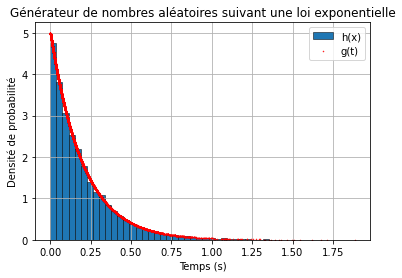

Valeur moyenne obtenue: 0.20 s


In [3]:
N=int(1e4)
T=0.2 # s

h_x = [h(i) for i in f(N)] # F_inf
g_x = [g(i) for i in h_x] # f

n,bins,patches = plt.hist(h_x, bins=50, density=True, label='h(x)', ec='black', linewidth=0.5)
plt.plot(h_x,g_x,'r.',markersize=1, label='g(t)')
plt.title('Générateur de nombres aléatoires suivant une loi exponentielle')
plt.xlabel('Temps (s)')
plt.ylabel('Densité de probabilité')
plt.legend()
plt.grid()
plt.show()

print('Valeur moyenne obtenue: {:.2f} s'.format(np.mean(h_x)))

On constate effectivement l'obtention d'un modèle exponentiel pour la distribution des valeurs générées. Nous pouvons vérifier que la moyenne des valeurs générées est égale à la valeur attendue de $\mu = 0.2 s$. De même, nous pouvons vérifier que l'option `density = True` de la fonction `hist` permet de normaliser l'histogramme pour qu'il représente une densité de probabilité.

## Mesure d'un taux de comptage

Dans cette partie, nous souhaitons étudier la loi de Poisson, qui est une loi de probabilité discrète exprimant la probabilité d'un nombre donné d'événements se produisant dans un intervalle fixe de temps. Elle est définie par un paramètre $\lambda$, qui représente le taux de comptage moyen.

$$ P(k, \lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$

Dans notre cas, nous commençons par créer une fonction qui calcule le temps de chaque événement à partir d'une liste d'intervalles de temps. Ensuite, nous pouvons appliquer cette fonction contenant $100 000$ intervalles de temps générés grâce à notre fonction exponentielle définie précédemment. Nous tracerons ensuite la distribution des temps des événements.

En Python, le mot réservé `lambda` existe, nous utiliserons donc `mu` pour définir le taux de comptage moyen $\lambda$.

In [4]:
# Fonction pour calculer la somme cumulée des temps suivant une loi exponentielle
def calculate_temps (t):
  return np.cumsum(np.insert(t, 0, 0))

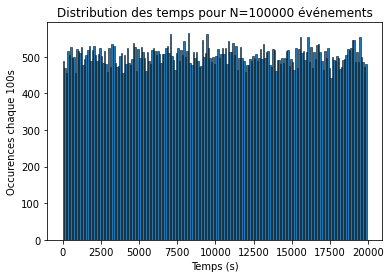

In [7]:
N = int(1e5)
h_x = [h(i) for i in f(N)]
x = calculate_temps(h_x)

plt.hist(x, bins=np.arange(0, 20000, 100), ec="black", linewidth=0.5)
plt.title("Distribution des temps pour N=" + str(N) + " événements")
plt.xlabel("Temps (s)")
plt.ylabel("Occurences chaque 100s")
plt.show()

On observe effectivement que la distribution pour $N=100 000$ événements est stable dans le temps.

Maintenant, nous pouvons compter le nombre d'événements par seconde et observer la distribution de ces valeurs. Pour cela, nous allons créer une fonction prenant comme paramètres le tableau des `temps` et un intervalle de temps `dt=1s`. L'objectif est de retourner le nombre d'événements par le $\Delta t$ donnée.

De plus, à l'aide de la fonction `poisson.pmf` (*Probability Mass Function*) de `scipy.stats`, nous allons comparer nos valeurs générées avec le modèle de la loi de Poisson.

In [8]:
def count_events(times, dt=1):
    """
    Fonction pour compter le nombre d'événements dans chaque intervalle de temps.
    """
    intervals = np.arange(np.floor(np.min(times)), np.ceil(np.max(times))+1, dt)
    event_counts = np.histogram(times, bins=intervals)[0]

    return event_counts

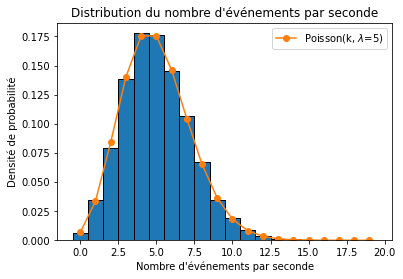

In [9]:
event_time = count_events(calculate_temps(h_x), 1) # Nombre d'événements par seconde

ks = [k for k in range(0,20)] # k
mu = 1/T # lambda

plt.hist(event_time,bins=np.arange(-0.5, 20, 1), ec="black", density = True)
plt.plot(ks,poisson.pmf(ks, mu), "-", marker="o", label="Poisson(k, $\lambda$="+str(int(mu))+")")
plt.title("Distribution du nombre d'événements par seconde")
plt.xlabel("Nombre d'événements par seconde")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()

On constate que la distribution des valeurs générées suit effectivement une loi de Poisson. De plus, nous pouvons vérifier si l'espérance et la variance correspondent aux valeurs attendues. En raison de la rareté et de l'indépendance des événements, nous avons :

$$ \mathbb{E}[X] = \sigma_X^2 = \lambda $$

Pour $\lambda = \frac{1}{\tau} = 5 s^{-1}$.

In [10]:
# Variance 
variance = np.var(event_time)

# Espérance
esperance = np.mean(event_time)

print("Variance obtenue: {:.2f}, variance attendue: {:.2f}".format(variance, mu))
print("Espérance obtenue: {:.2f}, espérance attendue: {:.2f}".format(esperance, mu))

Variance obtenue: 5.04, variance attendue: 5.00
Espérance obtenue: 5.03, espérance attendue: 5.00


Et donc, nous confirmons que les valeurs générées correspondent bien aux valeurs attendues. Par conséquent, la distribution suit une loi de Poisson.

Maintenant, nous appliquons la fonction de comptage définie précédemment pour des intervalles de temps entre $\Delta t = 0.2s$ et $\Delta t = 0.5s$. Ainsi, la valeur de $\lambda$ doit être ajustée selon la relation $\lambda_{\Delta t} = \frac{\Delta t}{\tau}$.

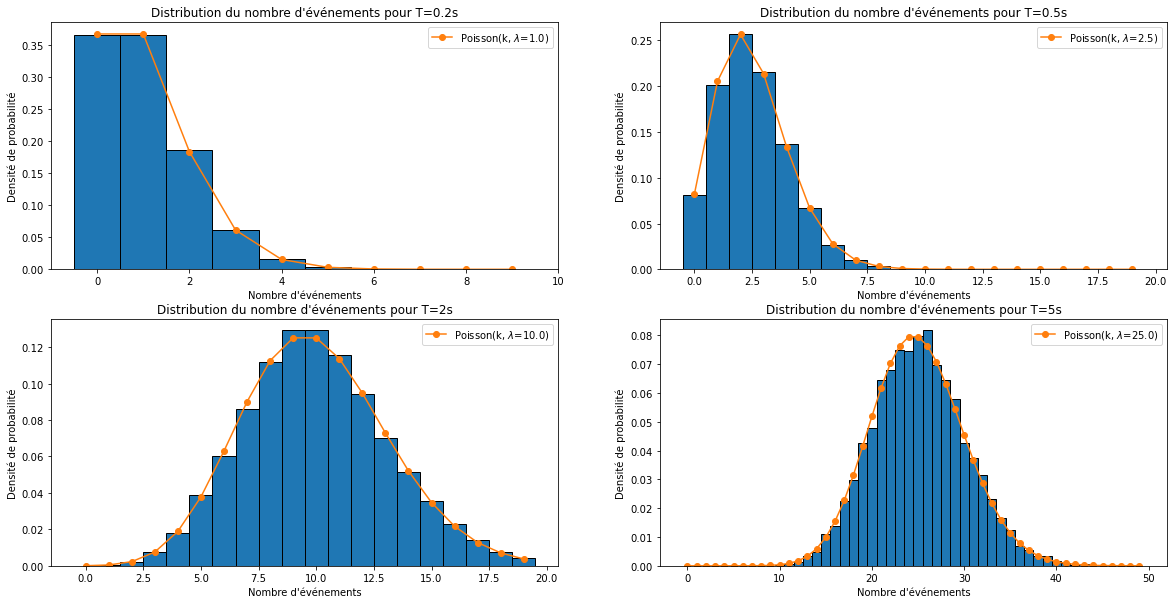

In [11]:
N = 10
Ts = [0.2, 0.5, 2, 5] # liste de temps
bins_numbers = [10, 20, 20, 50] # nombre de bins

moyennes = list()
variances = list()

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
  event_times = count_events(calculate_temps(h_x), Ts[i])
  ax.hist(event_times, bins=np.arange(-0.5, bins_numbers[i], 1), ec="black", density = True)
  
  mu = Ts[i]/T
  ks = [k for k in range(0,bins_numbers[i])]
  ax.plot(ks,poisson.pmf(ks, mu),"-",marker="o",label="Poisson(k, $\lambda$="+str(mu)+")")
  
  ax.set_title('Distribution du nombre d\'événements pour T='+str(Ts[i])+'s')
  ax.set_ylabel('Densité de probabilité')
  ax.set_xlabel('Nombre d\'événements')
  ax.legend()
  
  moyennes.append(np.mean(event_times))
  variances.append(np.var(event_times))
  
plt.show()

Pour des valeurs de $\Delta t > 1$ ou $\lambda >= 10$, la distribution devient relativement symétrique avec une valeur moyenne de $\lambda_{\Delta t}$, ce qui indique qu'à des valeurs plus grandes de $\lambda$, la loi de Poisson est une approximation de la loi binomiale. De même, pour des valeurs de $\Delta t < 1$, la distribution n'est plus symétrique autour de $\lambda_{\Delta t}$.

De plus, nous pouvons tracer la variance en fonction de la moyenne lorsque nous faisons varier $\Delta t$.

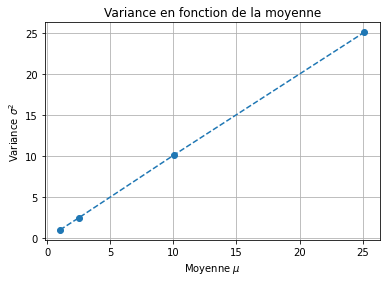

In [12]:
plt.plot(moyennes, variances, 'o--')
plt.title('Variance en fonction de la moyenne')
plt.xlabel('Moyenne $\mu$')
plt.ylabel('Variance $\sigma^2$')
plt.grid()
plt.show()

On constate que la variance et la moyenne sont toujours égales. Cela s'explique dans le cas où l'on a des événements avec une probabilité de succès faible, où $\lambda = Np$ (avec $p << 1$) est proportionnel à $\Delta t$. Ainsi, on peut concluire que à partir de $\lambda = 10$, la loi de Poisson converge vers une loi normale.

## Planche de Galton

Dans cette dernière partie, nous étudions un dispositif inventé par Francis Galton en 1877, appelé "quinconce". Il s'agit d'une planche inclinée sur laquelle des billes dévalent la pente en se heurtant à des clous disposés en quinconce, avec autant de chances de passer à droite qu'à gauche. Galton a créé ce dispositif lorsqu'il étudiait le rapport entre la taille d'un enfant et celle de ses parents. Notre objectif est de simuler la distribution des billes lorsqu'elles traversent $n$ rangées de clous et se répartissent dans $n+1$ cases, en partant d'une case centrale, c'est-à-dire lorsque la position initiale est 0.

### Questions préparatoires

*Dans une panche de Galton avec n couches de clous, quelles sont les positions extrêmes que pourra prendre la bille ?*

Dans une planche de Galton avec $n$ couches de clous, les positions extrêmes que pourra prendre la bille sont $-n$ à gauche et $+n$ à droite, pour $n+1$ cases.

*Quelle est la loi de probabilité associé avec la direction de la bille après collision ?*

Au moment que la bille arrive à un clou, elle peut tomber à gauche ou à droite avec une probabilité de $0.5$ pour chaque direction. Ainsi, la direction de la bille après collision suit une loi de probabilité binomiale.

### Simulation numérique d’une planche de Galton

On commence par créer une fonction qui permet de générer une variable aleatoire $X$ dans l'intervalle $[0,1]$ avec $p(X=0)=p(X=1)=\frac{1}{2}$. Pour donner le déplacement entre $\pm 1$.

In [13]:
def X():
  """Cette fonction retourne une valeur aléatoire entre 0 et 1."""
  return random.randint(0, 1)

print('Exemple d\'une valeur produite par X entre 0 et 1: ',[X() for i in range(10)])

Exemple d'une valeur produite par X entre 0 et 1:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


En suite, on crée une fonction qui simule la position de la bille après $n$ couches de clous.

In [42]:

def simulate_collision(x=None):
  """Simule le déplacement d'une bille en ajoutant ±1 à sa position de façon aléatoire."""
  if x == None:
    x = 0
  movement = X() * 2 - 1 # Génère -1 ou 1 aléatoirement
  return x + movement

def simulate_position(n):
  """Simule la position de la bille après n couches de clous."""
  position = 0
  for i in range(n):
    position = simulate_collision(position)
  return position


On peut étudier l'évolution de la répartition des boules en fonction du nombre de lancers.

In [17]:
ns = [10, 100, 1000, 10000, 100000]
for n in ns:
  x = simulate_position(n)
  print("Pour n={}, la position est {}".format(n,x))

Pour n=10, la position est 2
Pour n=100, la position est 18
Pour n=1000, la position est -30
Pour n=10000, la position est -16
Pour n=100000, la position est -528


Pour n=10 la valeur moyenne: -0.007 et variance: 9.910 
Pour n=50 la valeur moyenne: -0.034 et variance: 50.066 
Pour n=100 la valeur moyenne: -0.002 et variance: 99.975 


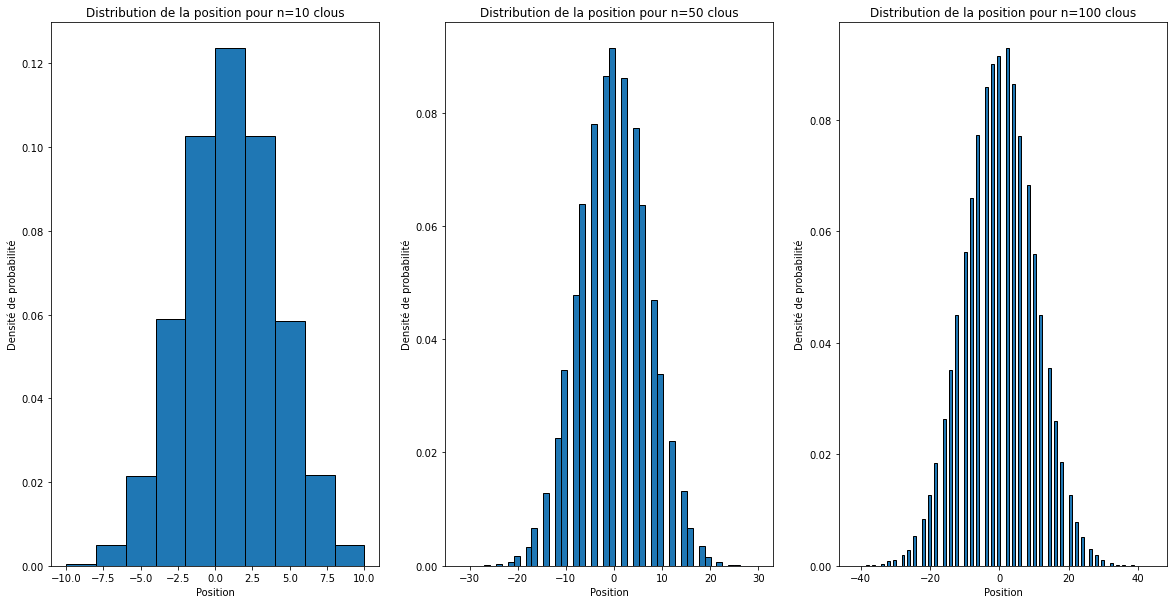

In [34]:
N = 100000 # tirages
ns = [10, 50, 100] # clous

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
  xs = [simulate_position(ns[i]) for _ in range(N)]
  n, bins, patches = ax.hist(xs, bins=ns[i], density=True, ec='black')
  ax.set_title('Distribution de la position pour n='+str(ns[i])+' clous')
  ax.set_xlabel('Position')
  ax.set_ylabel('Densité de probabilité')

  print('Pour n={} la valeur moyenne: {:.3f} et variance: {:.3f} '.format(ns[i], np.mean(xs), np.var(xs)))
  
plt.show()

On observe que la forme de la distribution varie en fonction de $n$. La moyenne de nos modélisations reste toujours à $0$ et la variance reste approximativement égale à $n$. Pour des valeurs grandes de $n$ et lorsque $n$ tend vers l'infini, la distribution tend de plus en plus vers une loi normale et converge vers la courbe de Gauss.


Dans notre modèle, chaque position est comptée à partir de $0$, avec $+1$ à droite et $-1$ à gauche de chaque clou. Lorsque la bille rencontre un nombre pair $n = 2k$ de couches de clous, seules les positions finales paires sont possibles, remplissant ainsi uniquement les bins pairs. En revanche, avec un nombre impair $n = 2k + 1$ de couches de clous, seules les positions finales impaires sont atteignables, remplissant donc uniquement les bins impairs. Une vraie planche de Galton n'a pas de positions vides entre les positions remplies. Elle possède $n$ positions finales, tandis que notre modèle en compte $2k + 1$, d'où la nécessité d'un coefficient correctif pour superposer une distribution gaussienne à notre histogramme.

## Conclusion

Dans ce TP, nous avons étudié la génération d'une loi exponentielle à partir d'une loi uniforme. Nous avons également mesuré un taux de comptage et vérifié que les valeurs générées suivent une loi de Poisson. Enfin, nous avons modélisé le fonctionnement d'une planche de Galton, dont la distribution tend à suivre une loi normale pour un grand nombre de tentatives.